In [39]:
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import json

In [40]:
def top_keywords(keyword_lists, top=5): 
    
    return Counter(list(chain.from_iterable(keyword_lists))).most_common(top)

In [41]:
events = json.load(open('gdelt_hate.json', 'rb'))

In [42]:
c = 0
for r, a in events.items():
    if a['length'] >= 6:
        c += 1
print(c)

58


## General Formatting

In [43]:
events = json.load(open('gdelt_hate.json', 'rb'))
df = pd.DataFrame.from_dict(events).transpose()

a_1 = df['actor_one'].apply(pd.Series)
a_1 = a_1.rename(columns = lambda x : 'a1_' + str(x))
df  = pd.concat([df[:], a_1[:]], axis=1)

a_2 = df['actor_two'].apply(pd.Series)
a_2 = a_2.rename(columns = lambda x : 'a2_' + str(x))
df  = pd.concat([df[:], a_2[:]], axis=1)

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df['articles'] = df['articles'].astype('int64')
df['div_cnt']  = df['div_cnt'].astype('int64')
df['length']   = df['length'].astype('int64')
df['area']     = df['area'].astype('int64')
df['tone']     = df['tone'].astype('int64')

df.fillna(0)
df.sort_values('start_end', inplace=True)

df

,start_end,actor_one,actor_two,area,articles,div_cnt,keywords,length,tone,a1_0,...,a2_3,a2_4,k_0,k_1,k_2,k_3,k_4,start,end,year
0,20150209_20150214,"[POLICE, TEXAS, BELIEVER, SYRIAN, MUSLIM]","[ISLAMIC, NEIGHBORHOOD, MEMPHIS, AMERICAN, UNI...",202,54,3,"[MUSLIM, ISLAMIC, VOICE, SAY, STUDENTS]",4,-5,POLICE,...,AMERICAN,UNITED STATES,MUSLIM,ISLAMIC,VOICE,SAY,STUDENTS,20150209,20150214,2015
1,20150216_20150222,"[BELIEVER, BELIEVER, WISCONSIN, PRESIDENT, UNI...","[REFUGEE, REFUGEE, POLICE, MUSLIM, CRIMINAL]",463,275,7,"[MUSLIM, MAN, STABBED, RELIGIOUS, STATE]",6,-6,BELIEVER,...,MUSLIM,CRIMINAL,MUSLIM,MAN,STABBED,RELIGIOUS,STATE,20150216,20150222,2015
2,20150224_20150228,"[THE US, NEIGHBORHOOD, ATHENS, NEIGHBOURHOOD, ...","[CIVILIAN, UNITED STATES, UNITED STATES, SCHOO...",695,227,8,"[MUSLIM, STATE, MARTIN, TRAYVON, ZIMMERMAN]",5,-5,THE US,...,SCHOOL,EMPLOYEE,MUSLIM,STATE,MARTIN,TRAYVON,ZIMMERMAN,20150224,20150228,2015
3,20150308_20150311,"[UNITED STATES, IRAQI, COLUMNIST, HINDU, JEWISH]","[STUDENT, TEXAS, ISRAEL, WASHINGTON, COMMUNITY]",230,241,6,"[STATE, MUSLIM, TEXAS, BILL, OBAMA]",4,-4,UNITED STATES,...,WASHINGTON,COMMUNITY,STATE,MUSLIM,TEXAS,BILL,OBAMA,20150308,20150311,2015
4,20150314_20150411,"[STUDENT, SIKH, UNITED STATES, SAN FRANCISCO, ...","[UNITED STATES, HINDU, SCHOOL, SAN FRANCISCO, ...",868,1607,8,"[LAW, INDIANA, STATE, RELIGIOUS, FREEDOM]",27,-4,STUDENT,...,SAN FRANCISCO,MISSISSIPPI,LAW,INDIANA,STATE,RELIGIOUS,FREEDOM,20150314,20150411,2015
5,20150413_20150420,"[POLICE, COMMUNITY, POLICE, EMPLOYEE, GOVERNMENT]","[UNITED STATES, TERRORIST, COMMUNITY, NORTH CA...",315,652,6,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNITY]",6,-6,POLICE,...,NORTH CAROLINA,CALIFORNIA,COLLEGE,SHOOTING,STANCIL,POSSIBLE,COMMUNITY,20150413,20150420,2015
6,20150426_20150430,"[COMMUNITY, COMMUNITY, CONGRESS, GANG, COMMUNITY]","[STUDENT, UNIVERSITY, MUSLIM, REBEL, UNIVERSITY]",501,121,8,"[UNIVERSITY, CAMPUS, STATEMENT, COMMUNITY, POS...",5,-5,COMMUNITY,...,REBEL,UNIVERSITY,UNIVERSITY,CAMPUS,STATEMENT,COMMUNITY,POSTED,20150426,20150430,2015
7,20150503_20150510,"[COMPANIES, TEXAS, GOVERNMENT, BLOG, UNIVERSITY]","[AMERICAN, ISLAM, POLICE, TEXAS, TEXAS]",867,267,7,"[SPEECH, TEXAS, GELLER, MUSLIM, RIGHT]",8,-5,COMPANIES,...,TEXAS,TEXAS,SPEECH,TEXAS,GELLER,MUSLIM,RIGHT,20150503,20150510,2015
8,20150511_20150516,"[POLICE, CHRISTIAN, POLICE, ASSAILANT, PERVERT]","[IDAHO, GOVERNMENT, MINORITIES, PENNSYLVANIA, ...",1234,176,8,"[CITY, RIGHT, COMMENTS, WRITING, WHITE]",6,-4,POLICE,...,PENNSYLVANIA,AMERICAN,CITY,RIGHT,COMMENTS,WRITING,WHITE,20150511,20150516,2015
9,20150526_20150528,"[CHRISTIAN, COMMANDER, CHRISTIAN, CHRISTIAN, H...","[UNITED STATES, PRESIDENT, FLORIDA, PRESIDENTI...",364,65,6,"[RUBIO, SPEECH, DANGER, PRESENT, REAL]",3,-2,CHRISTIAN,...,PRESIDENTIAL CANDIDATE,MUSLIM,RUBIO,SPEECH,DANGER,PRESENT,REAL,20150526,20150528,2015


In [44]:
# df = df[df.start_end != '20150617_20150627']  # Dylan Roof Shooting
# df = df[df.start_end != '20170802_20170904']  # Unite the Right

## Yearly Statistics and Plots Over Time

In [45]:
gb = df.groupby('year').agg(['mean', 'median', 'min', 'max', 'count'])
gb.to_csv('yearly_agg.csv')
gb

area                            articles                           \
            mean median min   max count         mean median  min    max count   
year                                                                            
2015  459.925926  376.0  72  1234    27  1255.777778  445.0   54  15581    27   
2016  319.333333  289.5  73   576    30  1365.700000  787.0  259   7490    30   
2017  293.733333  303.5  52   581    30  2019.900000  753.5  188  17702    30   
2018  333.692308  316.0  73   773    26  1341.846154  718.5  119   8782    26   

      ...    length                           tone                       
      ...      mean median min max count      mean median min max count  
year  ...                                                                
2015  ...  9.000000    6.0   3  46    27 -5.370370     -5  -8  -2    27  
2016  ...  6.500000    5.5   3  23    30 -5.266667     -5  -6  -3    30  
2017  ...  8.766667    5.5   3  34    30 -5.633333     -6  -8  -4    30  
2018  ...  9.192308    6.0   3  42    26 -5.692308     -6  -7  -4    26  

[4 rows x 25 columns]

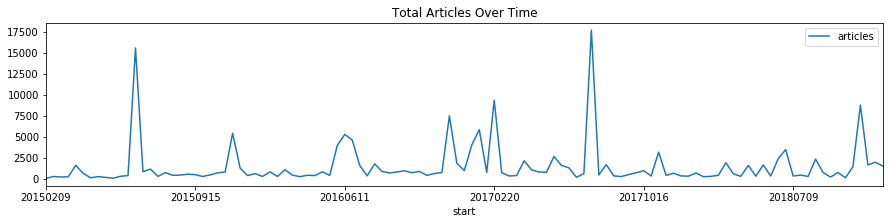

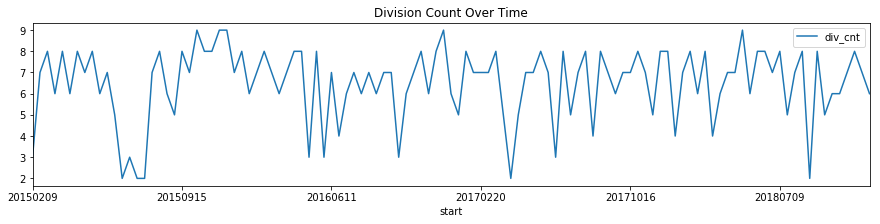

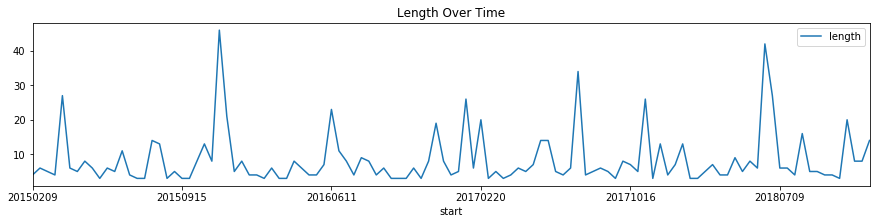

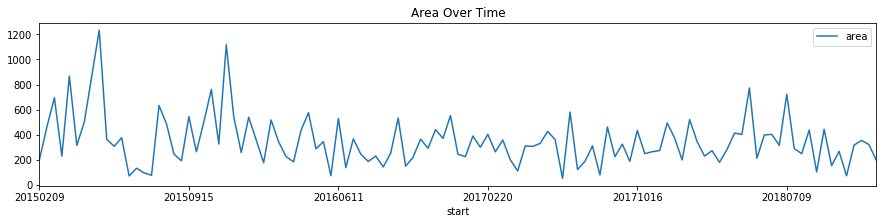

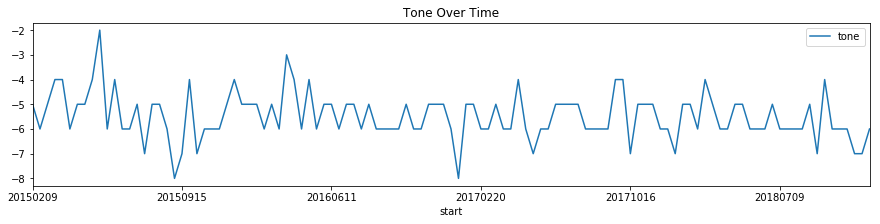

In [46]:
df.plot(x='start', y='articles', title='Total Articles Over Time', figsize=(15, 3))
df.plot(x='start', y='div_cnt', title='Division Count Over Time', figsize=(15, 3))
df.plot(x='start', y='length', title='Length Over Time', figsize=(15, 3))
df.plot(x='start', y='area', title='Area Over Time', figsize=(15, 3))
df.plot(x='start', y='tone', title='Tone Over Time', figsize=(15, 3))

## Top Keyword Statistics and Plots

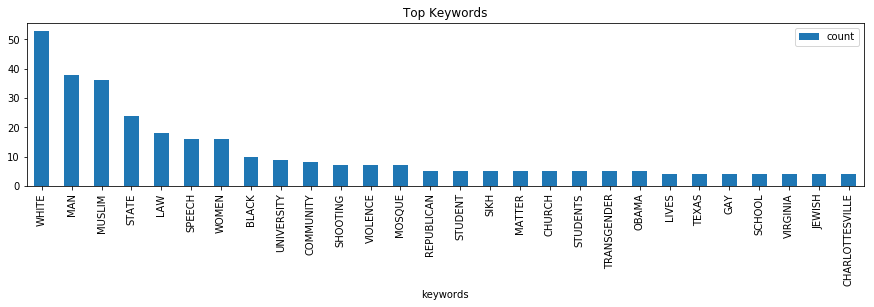

In [47]:
all_keywords = list(chain(*[k['keywords'] for k in events.values()]))

top_keys = [c for c in Counter(all_keywords).most_common(20)]

tk_df = pd.DataFrame([[a, b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_df = tk_df[tk_df['count'] >= 4]

tk_df.sort_values('count', inplace=True, ascending=False)
tk_df.plot(x='keywords', y='count', kind='bar', title='Top Keywords', figsize=(15, 3))

In [48]:
k_df_list = []
for keyword in tk_df.keywords:
    k_df = df[df.keywords.apply(lambda x: keyword in x)][['articles', 'length', 'area', 'div_cnt', 'tone']]
    k_df = k_df.agg(['mean', 'median', 'min', 'max'])
    k_df['keyword'] = keyword
    k_df_list.append(k_df)

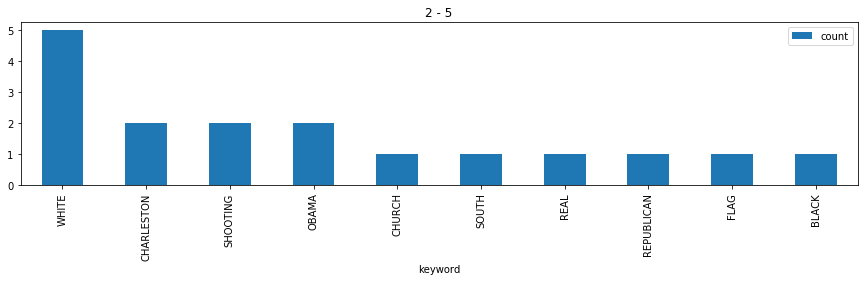

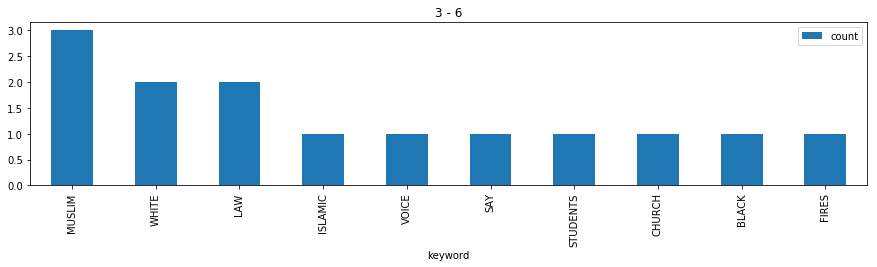

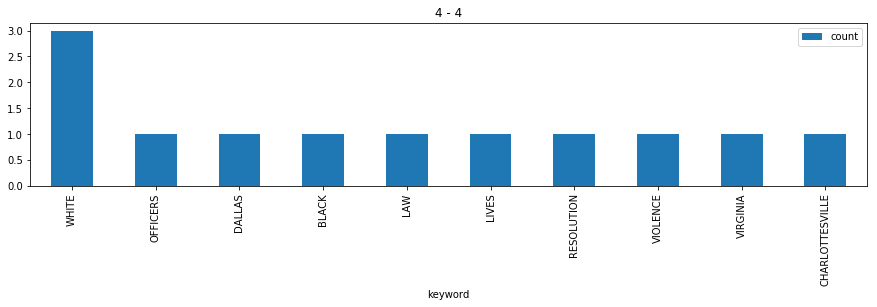

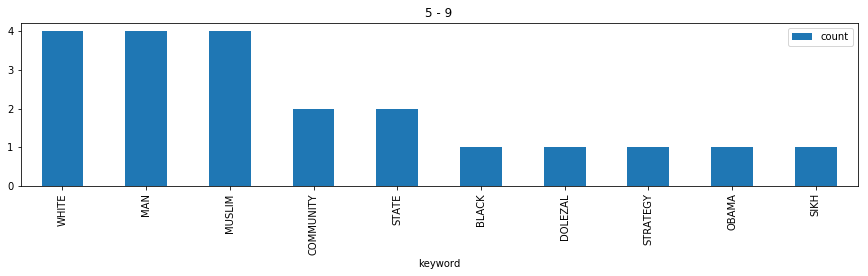

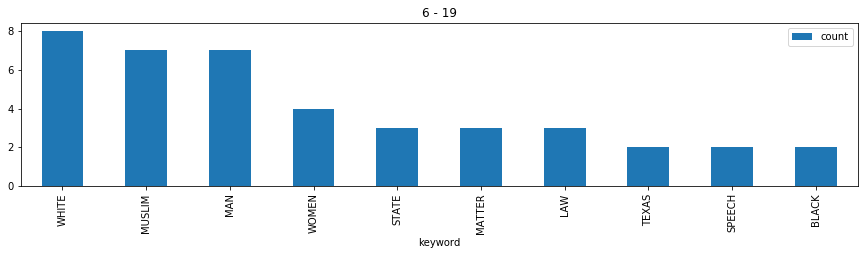

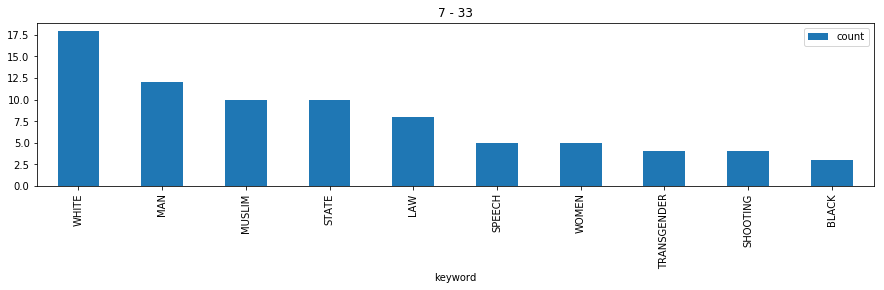

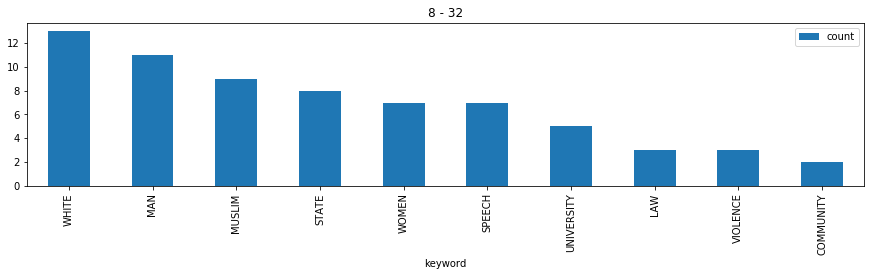

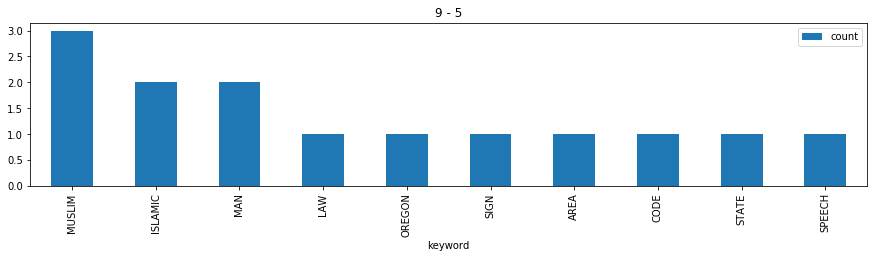

In [49]:
for i in range(2, 10):
    div_df = df[df.div_cnt == i]
    top = top_keywords(div_df.keywords, 10)
    x = pd.DataFrame(top, columns=['keyword', 'count'])
    x.plot(x='keyword', y='count', kind='bar', title=f'{i} - {len(div_df)}', figsize=(15, 3))

In [50]:
d_df = df[df.div_cnt > 3]
d_df = df[df.div_cnt <= 6]
d_df

,start_end,actor_one,actor_two,area,articles,div_cnt,keywords,length,tone,a1_0,...,a2_3,a2_4,k_0,k_1,k_2,k_3,k_4,start,end,year
0,20150209_20150214,"[POLICE, TEXAS, BELIEVER, SYRIAN, MUSLIM]","[ISLAMIC, NEIGHBORHOOD, MEMPHIS, AMERICAN, UNI...",202,54,3,"[MUSLIM, ISLAMIC, VOICE, SAY, STUDENTS]",4,-5,POLICE,...,AMERICAN,UNITED STATES,MUSLIM,ISLAMIC,VOICE,SAY,STUDENTS,20150209,20150214,2015
3,20150308_20150311,"[UNITED STATES, IRAQI, COLUMNIST, HINDU, JEWISH]","[STUDENT, TEXAS, ISRAEL, WASHINGTON, COMMUNITY]",230,241,6,"[STATE, MUSLIM, TEXAS, BILL, OBAMA]",4,-4,UNITED STATES,...,WASHINGTON,COMMUNITY,STATE,MUSLIM,TEXAS,BILL,OBAMA,20150308,20150311,2015
5,20150413_20150420,"[POLICE, COMMUNITY, POLICE, EMPLOYEE, GOVERNMENT]","[UNITED STATES, TERRORIST, COMMUNITY, NORTH CA...",315,652,6,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNITY]",6,-6,POLICE,...,NORTH CAROLINA,CALIFORNIA,COLLEGE,SHOOTING,STANCIL,POSSIBLE,COMMUNITY,20150413,20150420,2015
9,20150526_20150528,"[CHRISTIAN, COMMANDER, CHRISTIAN, CHRISTIAN, H...","[UNITED STATES, PRESIDENT, FLORIDA, PRESIDENTI...",364,65,6,"[RUBIO, SPEECH, DANGER, PRESENT, REAL]",3,-2,CHRISTIAN,...,PRESIDENTIAL CANDIDATE,MUSLIM,RUBIO,SPEECH,DANGER,PRESENT,REAL,20150526,20150528,2015
11,20150611_20150615,"[RABBI, BUSINESS, AFRICA, RABBI, INSPECTOR GEN...","[JEWISH, HILLARY CLINTON, MINORITIES, JEWISH, ...",376,390,5,"[WHITE, BLACK, DOLEZAL, STRATEGY, OBAMA]",5,-4,RABBI,...,JEWISH,OSAMA BIN LADEN,WHITE,BLACK,DOLEZAL,STRATEGY,OBAMA,20150611,20150615,2015
12,20150617_20150627,"[POLICE, POLICE, MAYOR, POLICE OFFICER, POLICE]","[MALE, SOUTH CAROLINA, POLICE, AFRICA, TELEVIS...",72,15581,2,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,-6,POLICE,...,AFRICA,TELEVISION,CHURCH,CHARLESTON,SHOOTING,SOUTH,WHITE,20150617,20150627,2015
13,20150630_20150703,"[UNITED STATES, UNITED STATES, MUSLIM, AUTHORI...","[JEWISH, THE ASSOCIATED PRESS, SIKH, UNITED ST...",133,849,3,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,-6,UNITED STATES,...,UNITED STATES,AFRICA,CHURCH,BLACK,FIRES,CHURCHES,SOUTH,20150630,20150703,2015
14,20150713_20150715,"[SOUTH CAROLINA, VIRGINIA, SUPREME COURT, ANTI...","[POLICE OFFICIALS, LAW ENFORCEMENT AUTHORITIES...",96,1155,2,"[WHITE, REAL, REPUBLICAN, CHARLESTON, OBAMA]",3,-5,SOUTH CAROLINA,...,UNITED STATES,KANSAS CITY,WHITE,REAL,REPUBLICAN,CHARLESTON,OBAMA,20150713,20150715,2015
15,20150718_20150720,"[AMERICAN, BARACK OBAMA, POLICE, REBEL SOLDIER...","[AFRICA, REBEL, HOSPITAL, AMERICAN, MUSLIM]",77,292,2,"[FLAG, WHITE, BLACK, CONFEDERATE, OBAMA]",3,-7,AMERICAN,...,AMERICAN,MUSLIM,FLAG,WHITE,BLACK,CONFEDERATE,OBAMA,20150718,20150720,2015
18,20150902_20150904,"[MUSLIM, MUSLIM, TARA, NEW YORK, POLICE]","[ALABAMA, ALABAMA, STUDENT, MAGAZINE, PABLO MA...",246,445,6,"[BLACK, LIVES, MATTER, MAN, WHITE]",3,-6,MUSLIM,...,MAGAZINE,PABLO MARTINEZ,BLACK,LIVES,MATTER,MAN,WHITE,20150902,20150904,2015


In [51]:
k_m = pd.concat(k_df_list)
k_m.head(n=10)

,articles,length,area,div_cnt,tone,keyword
mean,1972.094340,8.849057,294.735849,6.150943,-5.584906,WHITE
median,763.000000,5.000000,274.000000,7.000000,-6.000000,WHITE
min,176.000000,3.000000,72.000000,2.000000,-8.000000,WHITE
max,17702.000000,42.000000,1234.000000,8.000000,-4.000000,WHITE
mean,1038.789474,8.289474,330.657895,6.789474,-5.736842,MAN
median,651.500000,6.000000,291.000000,7.000000,-6.000000,MAN
min,275.000000,3.000000,73.000000,2.000000,-8.000000,MAN
max,5856.000000,42.000000,773.000000,9.000000,-4.000000,MAN
mean,1386.833333,10.388889,408.444444,6.666667,-5.250000,MUSLIM
median,763.000000,6.000000,380.500000,7.000000,-5.000000,MUSLIM


In [52]:
k_median = k_m.loc['max']
k_median.sort_values('div_cnt', ascending=False)

,articles,length,area,div_cnt,tone,keyword
max,7490.0,46.0,1117.0,9.0,-4.0,MUSLIM
max,7490.0,46.0,1117.0,9.0,-4.0,STATE
max,4627.0,27.0,868.0,9.0,-4.0,LAW
max,17702.0,46.0,1117.0,9.0,-2.0,SPEECH
max,1276.0,21.0,544.0,9.0,-5.0,SIKH
max,5856.0,42.0,773.0,9.0,-4.0,MAN
max,1779.0,21.0,544.0,9.0,-5.0,MOSQUE
max,17702.0,42.0,1234.0,8.0,-4.0,WHITE
max,1155.0,6.0,518.0,8.0,-4.0,REPUBLICAN
max,9365.0,26.0,403.0,8.0,-5.0,JEWISH


In [53]:
metrics = ['articles', 'length', 'area', 'tone']
keyword_data = []

for keyword in top_keys:
    
    key_df = df[df.keywords.apply(lambda x: keyword[0] in x)][metrics]
    
    agg_df = key_df.agg(['median'])
    
    keyword_data.append([
        keyword, 
        len(key_df), 
        len(key_df) / len(events.keys()) * 100, 
        *agg_df.values.tolist()[0]
    ])
    
summary = pd.DataFrame(keyword_data, columns=['keyword', 'count', 'percent'] + metrics)

## Compare Keyword Sample Metrics

In [54]:
tk = [t[0] for t in top_keys]

data = []

for row_k in tk:
    
    row_vals = []
    
    for col_k in tk:
        
        df_a = df[df.keywords.apply(lambda x: row_k in x)]
        df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
        perc = int((len(df_b) / len(df_a)) * 100)
        row_vals.append(perc)
        
    data.append(row_vals)
    
d = pd.DataFrame(data, index=[*tk], columns=[*tk])

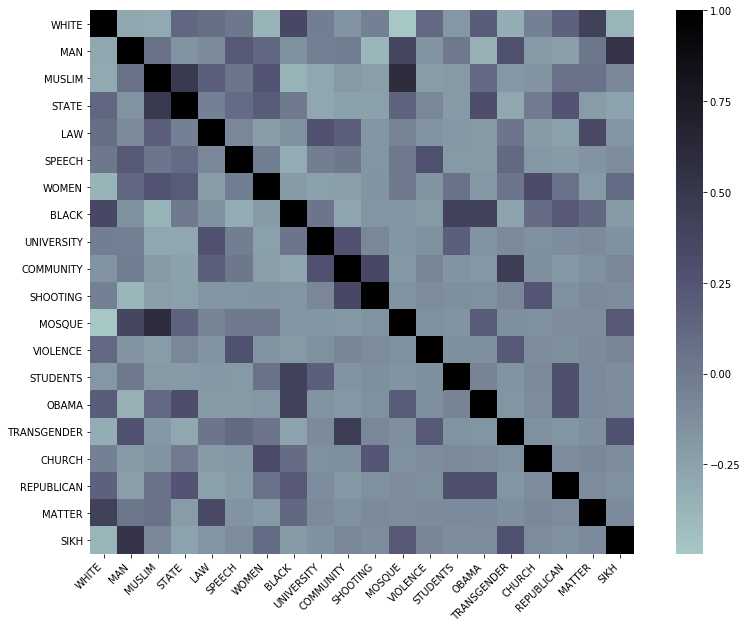

In [55]:
plt.figure(figsize=(15, 10))

corr = d.corr()
ax = sns.heatmap(corr, center=0,cmap='bone_r', square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');